<a href="https://colab.research.google.com/github/pugalCse01/Ml-Project/blob/main/Stock_Market_Analysis_%2B_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import yfinance as yf
from datetime import datetime

# Tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Date range: past 1 year
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data into individual variables
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)

# List of dataframes and names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Add company name to each dataframe
for company, name in zip(company_list, company_name):
    company["company_name"] = name

# Concatenate into one dataframe
df = pd.concat(company_list, axis=0)

# Show last 10 rows
print(df.tail(10))


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price      Close High  Low Open Volume company_name Close High  Low Open  ...  \
Ticker      AAPL AAPL AAPL AAPL   AAPL               GOOG GOOG GOOG GOOG  ...   
Date                                                                      ...   
2025-05-12   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-13   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-14   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-15   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-16   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-19   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-20   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-21   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-22   NaN  NaN  NaN  NaN    NaN       AMAZON   NaN  NaN  NaN  NaN  ...   
2025-05-23   NaN  NaN  NaN  

In [3]:
# Summary Stats
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.798206,225.066479,220.086101,222.407260,5.621996e+07
std,15.697864,15.234484,16.113120,15.901541,3.242208e+07
min,172.194199,189.692870,168.988411,171.724805,2.323470e+07
25%,213.130161,215.233427,210.588762,212.874446,3.964202e+07
50%,224.210564,226.070020,222.231372,224.170641,4.804335e+07
75%,232.515671,234.263584,229.182156,232.447929,6.036088e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [4]:
# General info
AAPL.columns

MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])

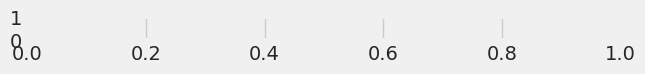

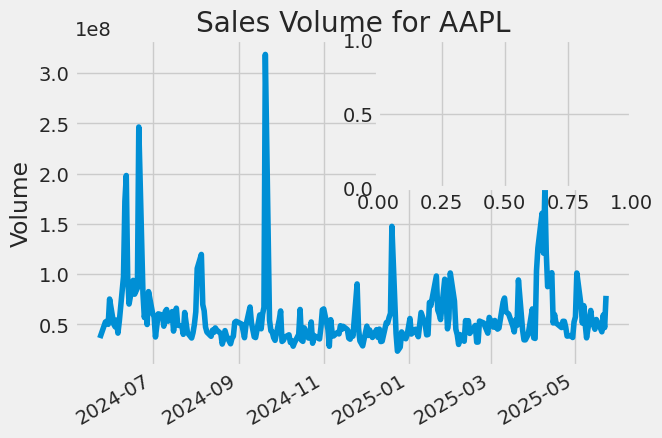

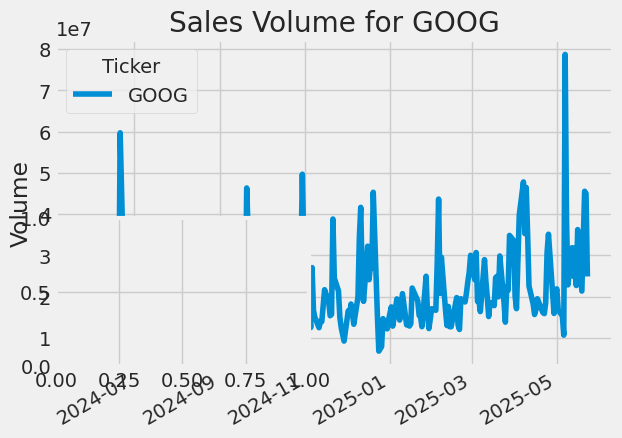

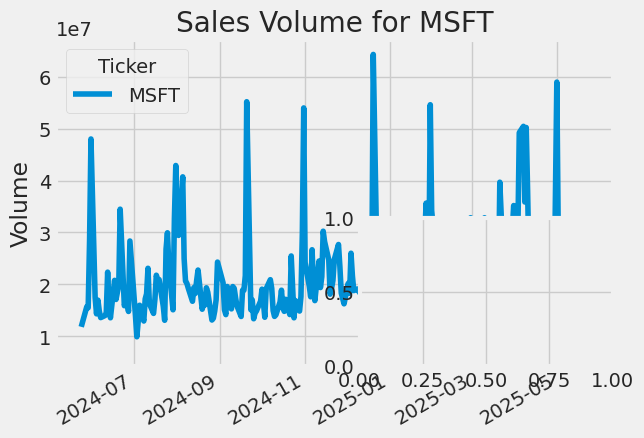

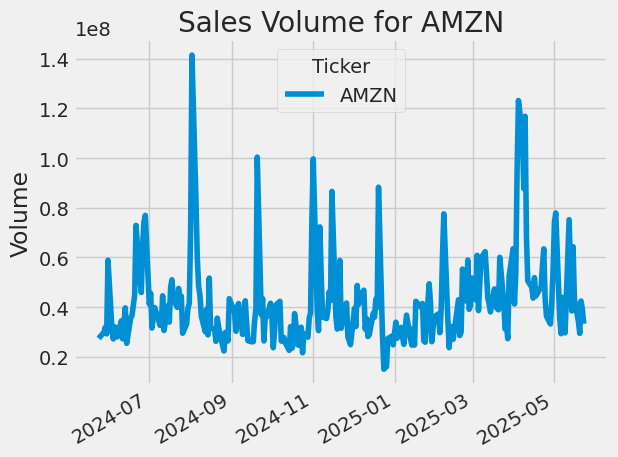

In [5]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

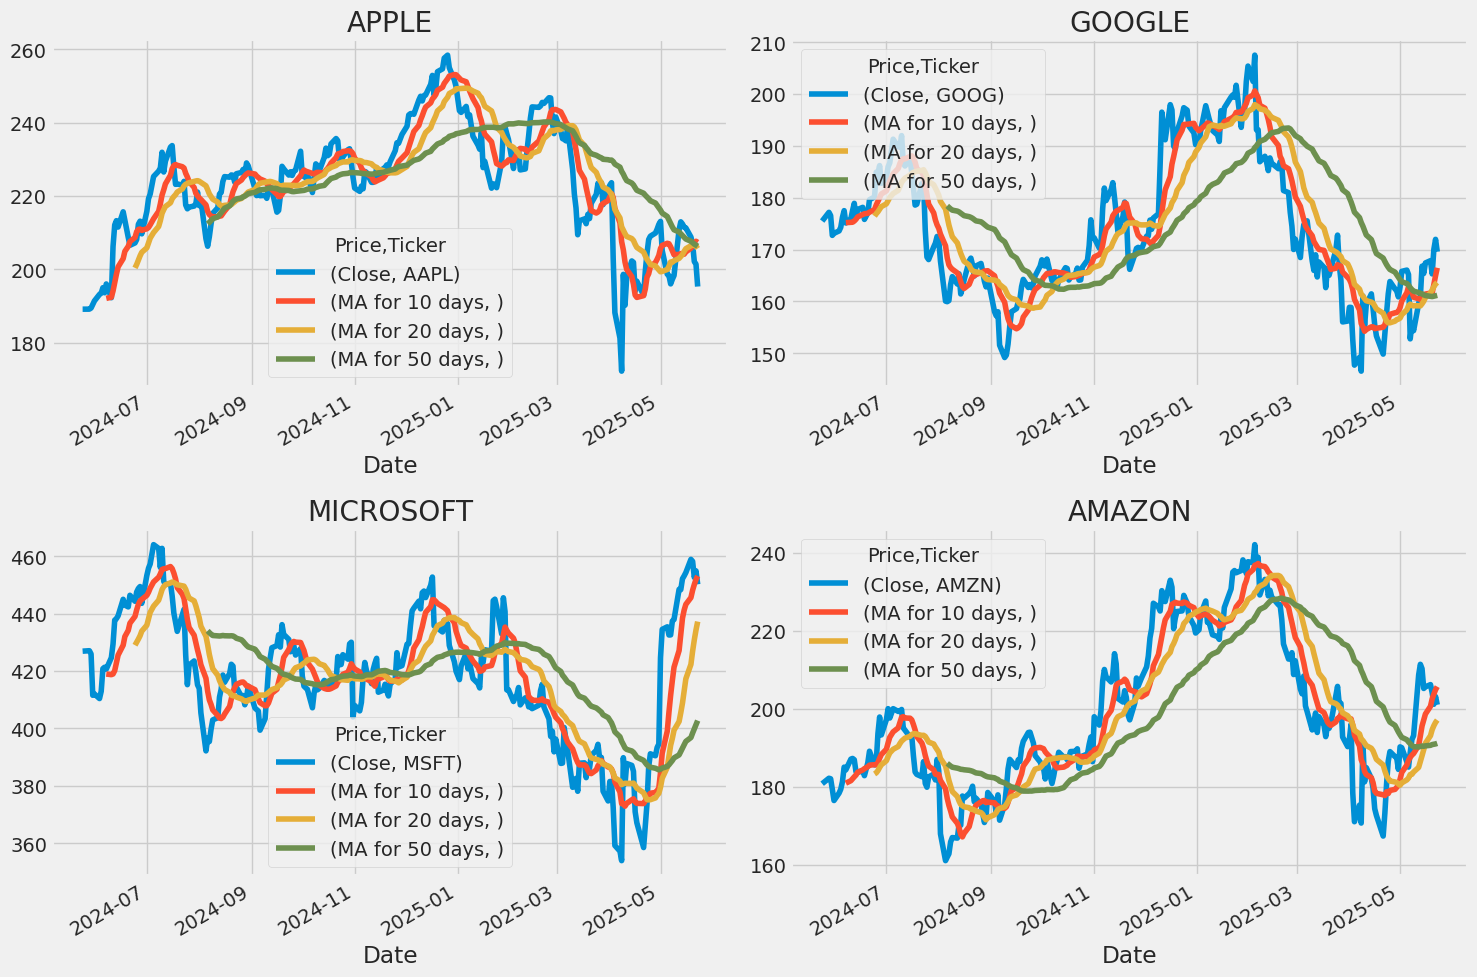

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

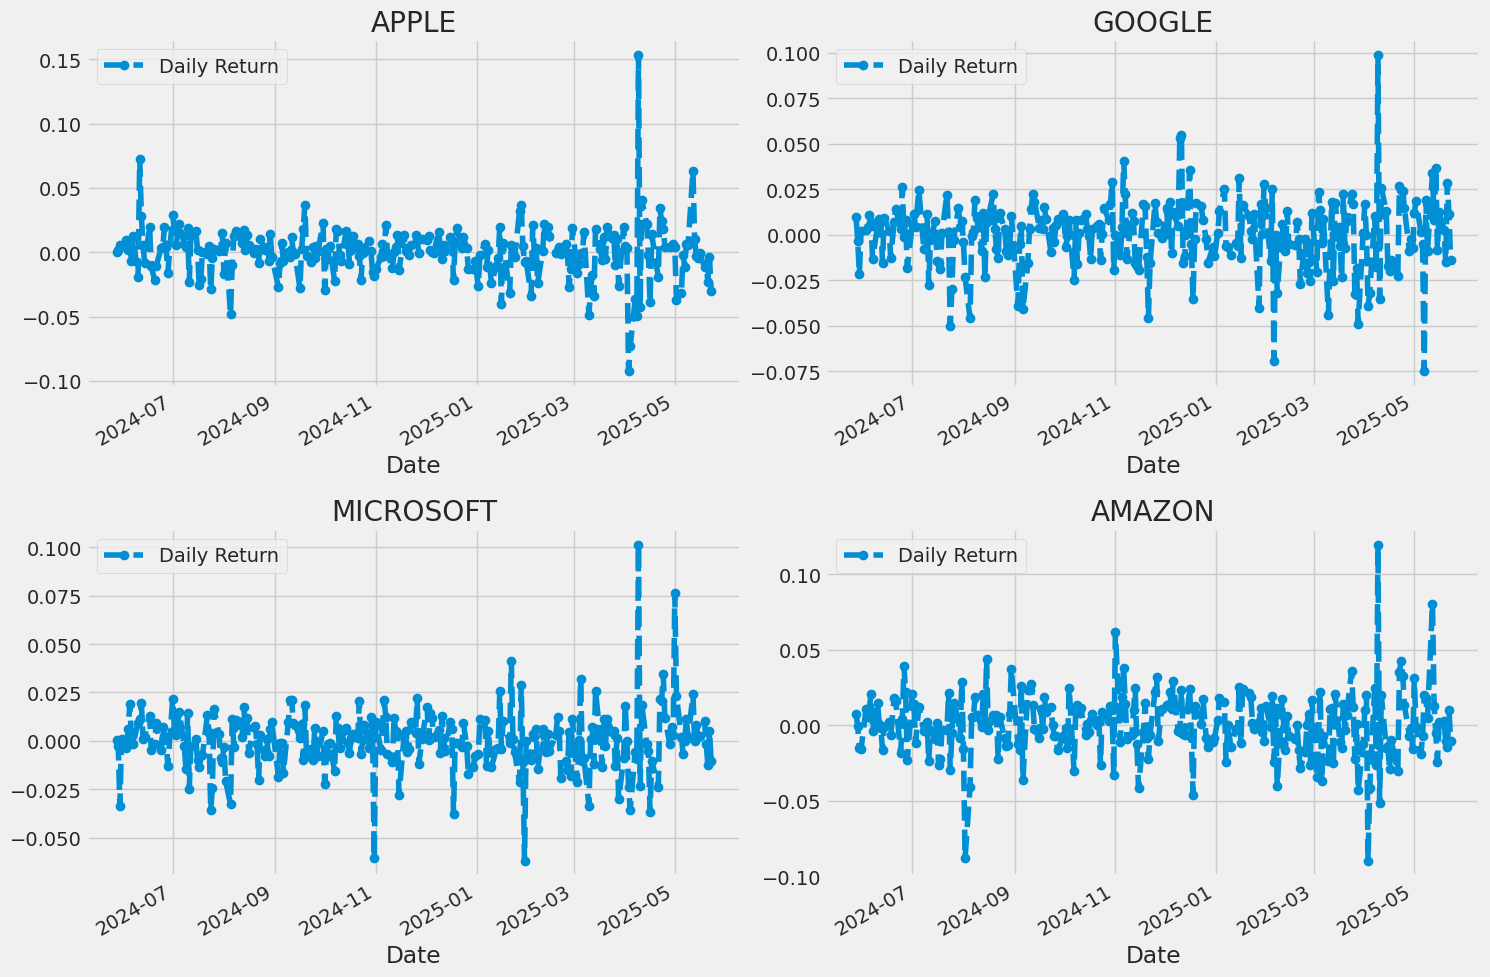

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

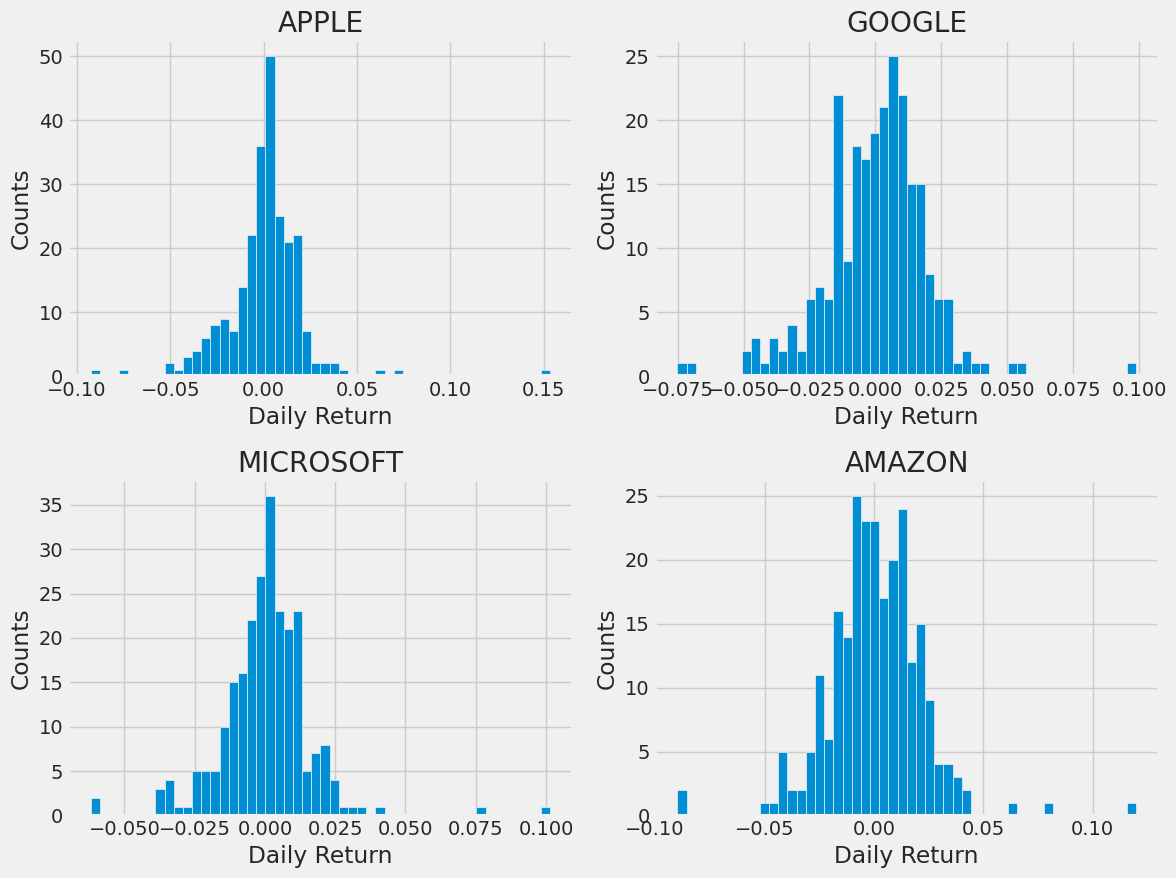

In [8]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [9]:
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Get closing prices
closing_df = yf.download(tech_list, start=start, end=end)['Close']

print(closing_df.tail())

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker            AAPL        AMZN        GOOG        MSFT
Date                                                      
2025-05-19  208.779999  206.160004  167.869995  458.869995
2025-05-20  206.860001  204.070007  165.320007  458.170013
2025-05-21  202.089996  201.119995  170.059998  452.570007
2025-05-22  201.360001  203.100006  171.979996  454.859985
2025-05-23  195.270004  200.990005  169.589996  450.179993


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-05-24,NaN,NaN,NaN,NaN
2024-05-28,0.000053,0.007745,0.009584,0.000372
2024-05-29,0.001579,-0.000714,-0.003483,-0.002672
2024-05-30,0.005255,-0.014834,-0.021646,-0.033786
2024-05-31,0.005019,-0.016061,0.002305,0.001109


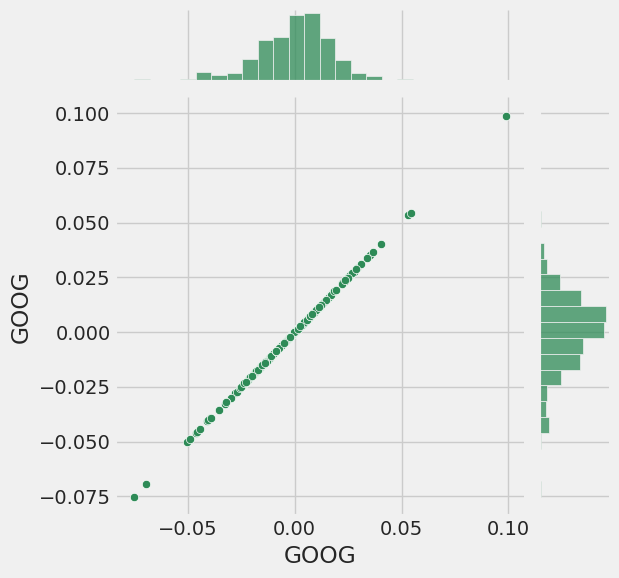

In [10]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

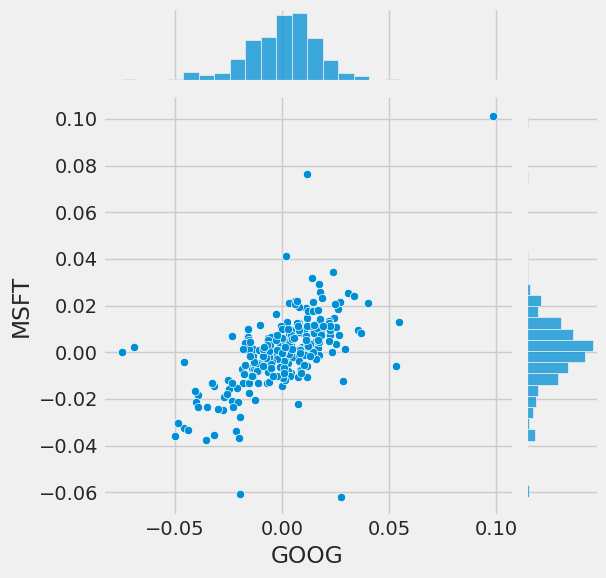

In [11]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

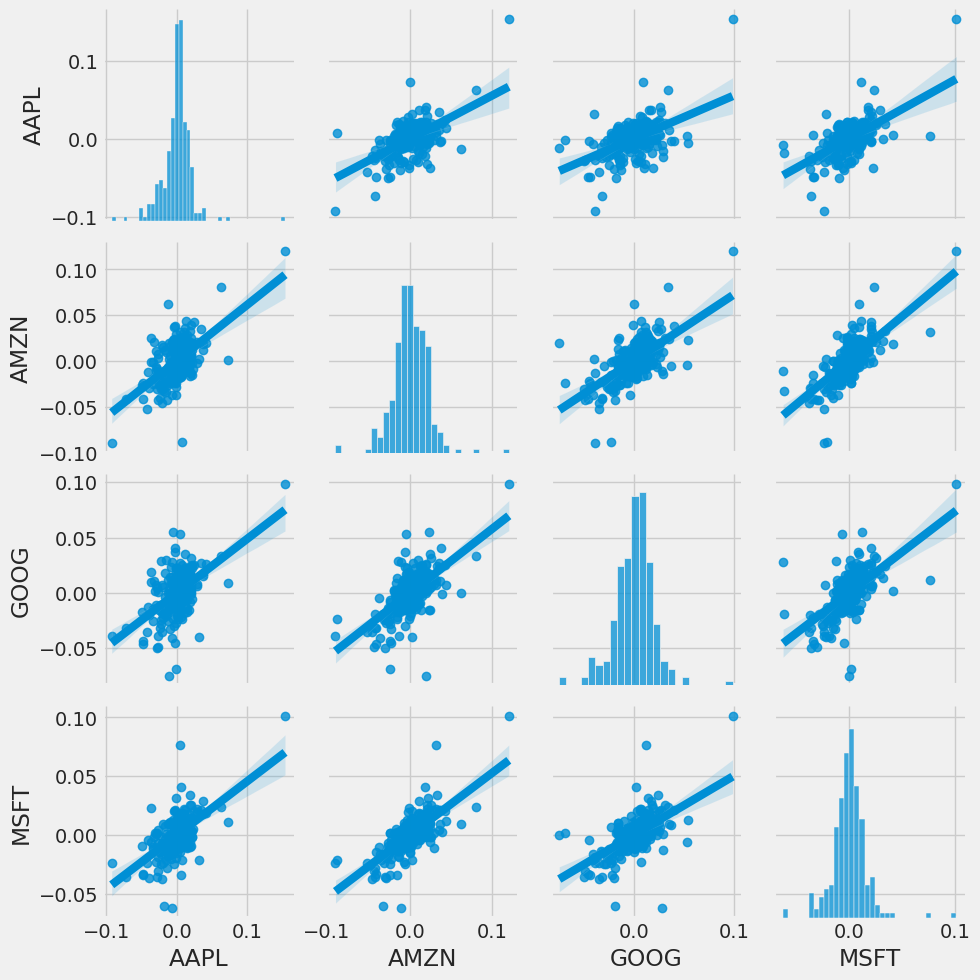

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

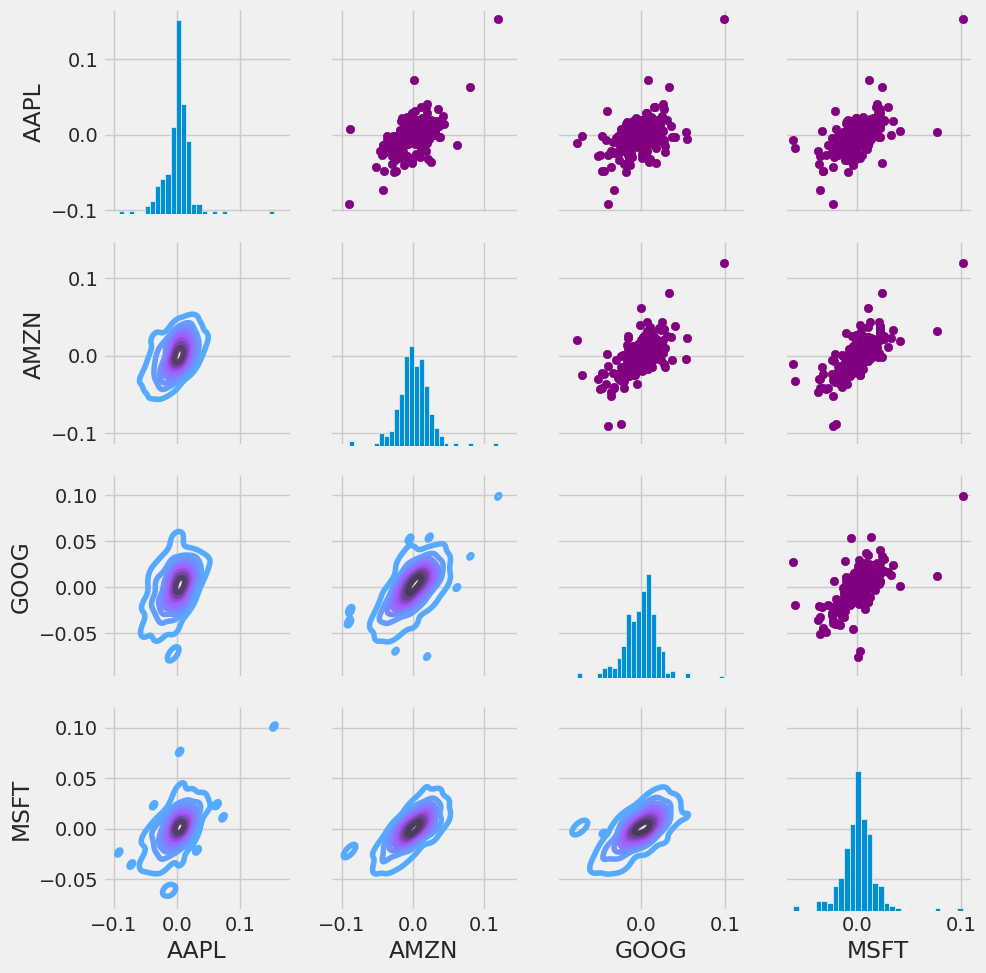

In [13]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

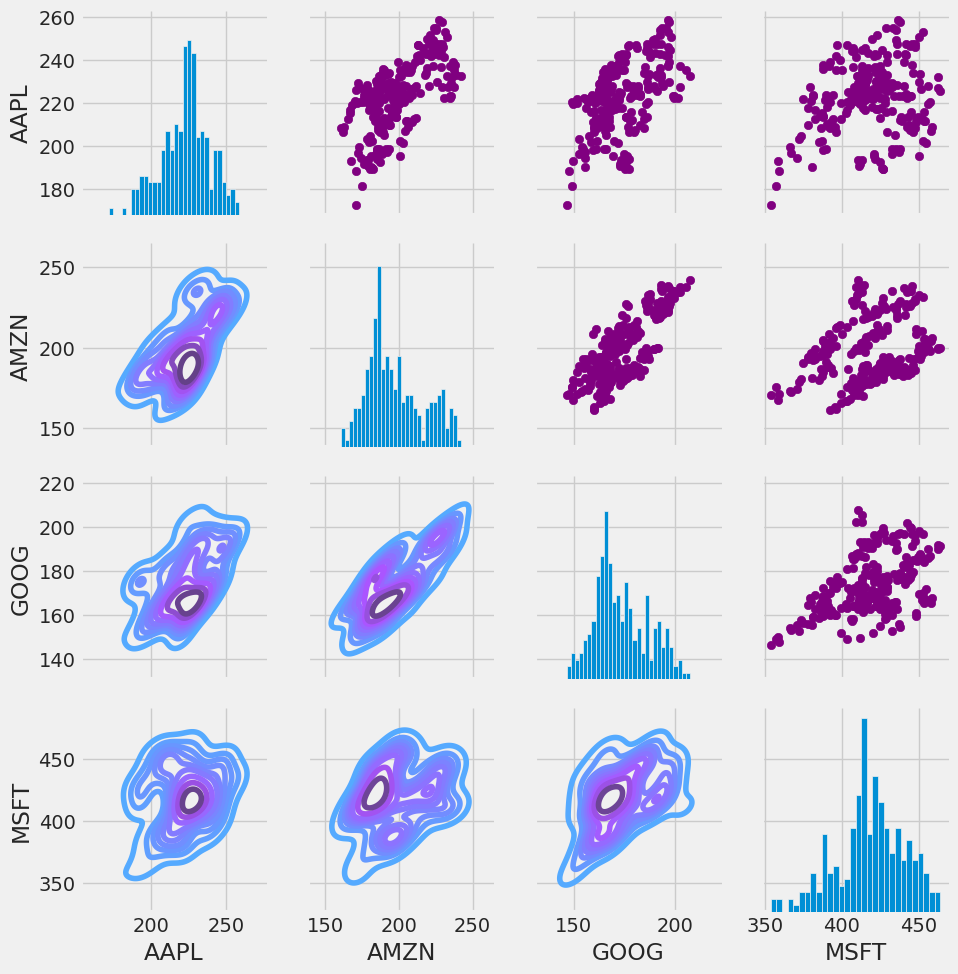

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

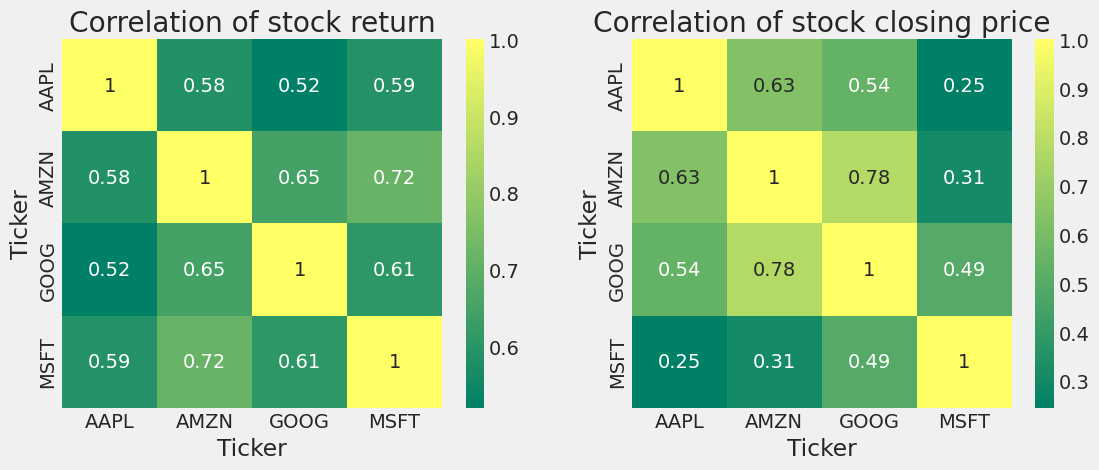

In [15]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

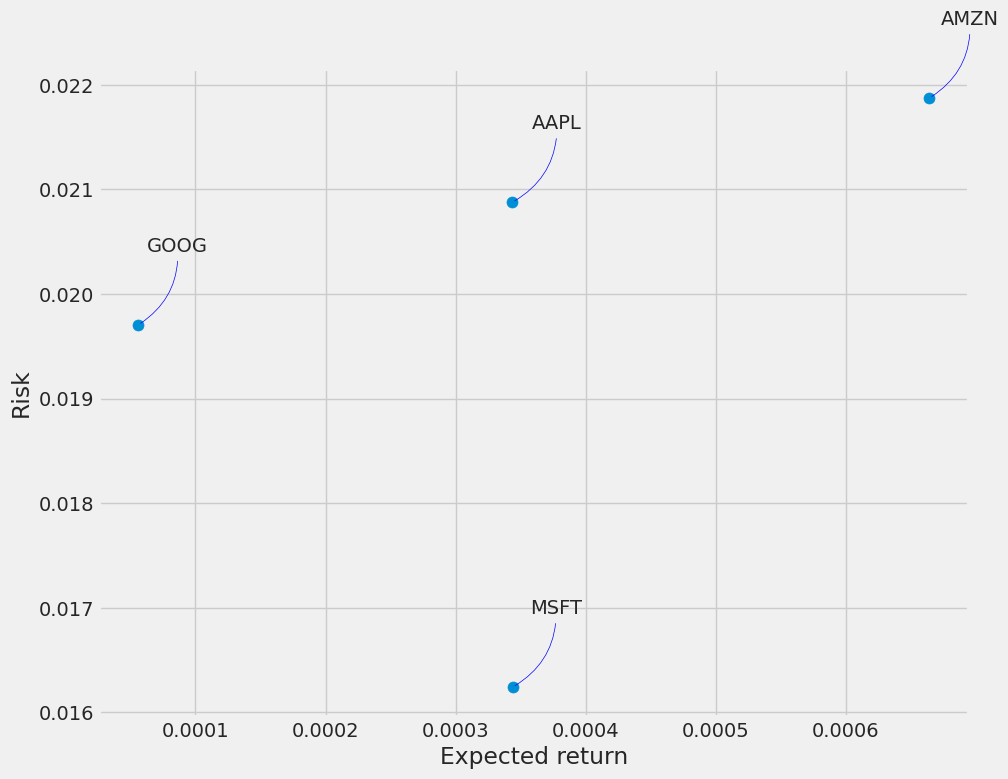

In [16]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [17]:
import yfinance as yf
from datetime import datetime

df = yf.download('AAPL', start='2005-01-01', end=datetime.now())


[*********************100%***********************]  1 of 1 completed


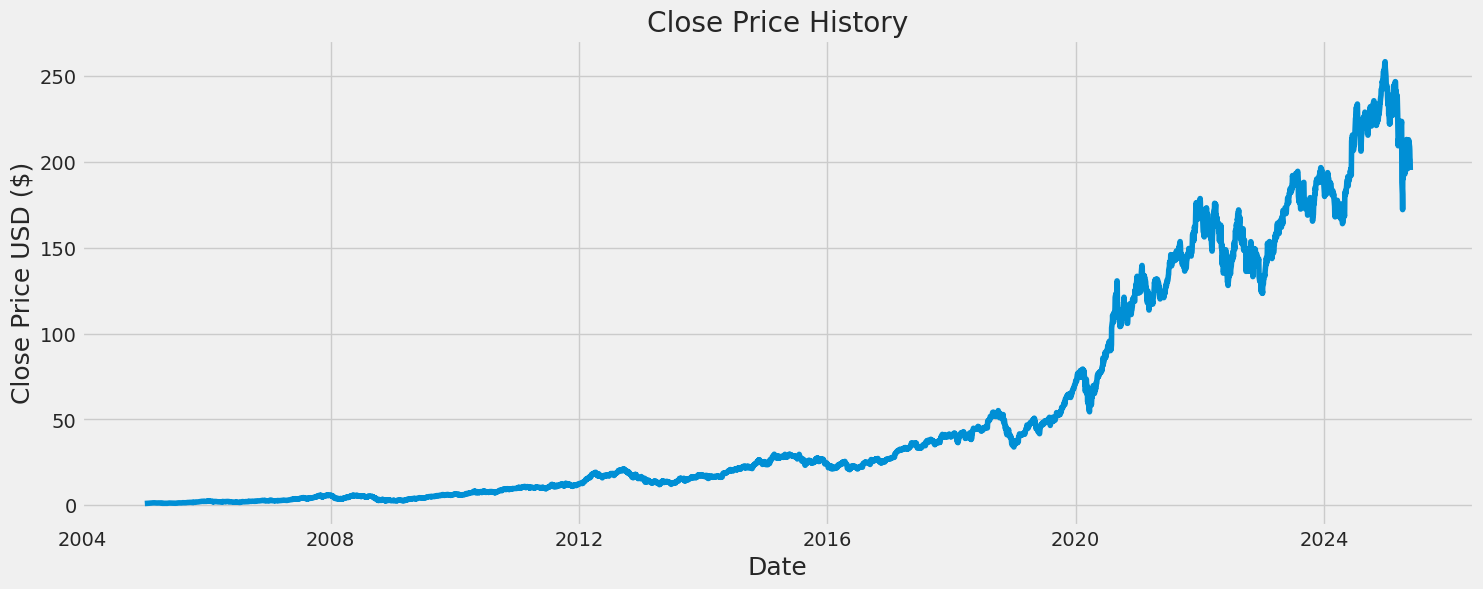

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
print(df.columns)


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [20]:
data = df['Close']['AAPL']


In [21]:
data = df['Close']


In [22]:
data = df['Close']['AAPL'].to_frame()  # convert to DataFrame if needed


In [23]:
# Dataset as numpy array
dataset = data.values

# Calculate training data length
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Split into training and testing data
train_data = dataset[:training_data_len, :]  # first 95% for training
test_data = dataset[training_data_len:, :]   # last 5% for testing


In [24]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Get historical stock data
df = yf.download('AAPL', start='2012-01-01', end='2023-01-01')

# Use only the 'Close' column
dataset = df[['Close']].values  # shape: (n_samples, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])


[*********************100%***********************]  1 of 1 completed

[[0.00269216]
 [0.0030905 ]
 [0.00391787]
 [0.00470557]
 [0.00458479]]


In [25]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00269216, 0.0030905 , 0.00391787, 0.00470557, 0.00458479,
       0.00485697, 0.00473259, 0.0045235 , 0.0042387 , 0.00512014,
       0.00591504, 0.00566991, 0.00432701, 0.00560862, 0.00434687,
       0.00907845, 0.00871254, 0.0091902 , 0.01022304, 0.0108485 ,
       0.01079624, 0.01060338, 0.01142529, 0.01219859, 0.01307463,
       0.0144896 , 0.01746187, 0.01750697, 0.01916171, 0.02039822,
       0.01827304, 0.01909139, 0.01907517, 0.02136975, 0.0210435 ,
       0.02164736, 0.02273245, 0.02333634, 0.02507573, 0.02634286,
       0.02670878, 0.02683674, 0.02467013, 0.02414742, 0.02422494,
       0.02626179, 0.02683497, 0.02806607, 0.0309681 , 0.03483991,
       0.0341153 , 0.03411708, 0.03691639, 0.03779244, 0.03716874,
       0.03659915, 0.03600618, 0.03797629, 0.03932817, 0.03989414])]
[np.float64(0.03849540254733497)]

[array([0.00269216, 0.0030905 , 0.00391787, 0.00470557, 0.00458479,
       0.00485697, 0.00473259, 0.0045235 , 0.0042387 , 0.00512014,
       0.00591504, 0.00

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 145s 52ms/step - loss: 0.0037


In [27]:
print("scaled_data.shape:", scaled_data.shape)
print("training_data_len:", training_data_len)
print("test_data.shape:", test_data.shape)

scaled_data.shape: (2768, 1)
training_data_len: 4875
test_data.shape: (256, 1)


In [28]:
# dataset is numpy array of shape (n_samples, 1)
dataset_len = len(dataset)

# Set training length to 95% of data (rounded down to avoid index errors)
training_data_len = int(dataset_len * 0.95)

print(f"Dataset length: {dataset_len}")
print(f"Training data length: {training_data_len}")

# Prepare test data starting 60 days before test start
test_data = scaled_data[training_data_len - 60:, :]

print(f"Test data shape: {test_data.shape}")

x_test = []
y_test = dataset[training_data_len:, :]  # true prices for test

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(f"x_test shape: {x_test.shape}")


Dataset length: 2768
Training data length: 2629
Test data shape: (199, 1)
x_test shape: (139, 60, 1)


In [29]:
print("scaled_data.shape:", scaled_data.shape)
print("training_data_len:", training_data_len)
print("test_data.shape:", test_data.shape)


scaled_data.shape: (2768, 1)
training_data_len: 2629
test_data.shape: (199, 1)


In [30]:
predictions = model.predict(x_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


In [31]:
mean_price = data['AAPL'].mean()
print("Average Close Price:", mean_price)
print("RMSE as % of average price:", (6.38 / mean_price) * 100, "%")


Average Close Price: 54.59257936254623
RMSE as % of average price: 11.686569996319061 %
